## Top2Vec

Top2Vec is an algorithm used to detect the topics present in the given document or text

    Working of Top2Vec
    
    Generate embedding vectors for documents and words.
    Perform dimensionality reduction on the vectors using an algorithm such as UMAP.
    Cluster the vectors using a clustering algorithm such as HDBSCAN.
    Assign topics to each cluster.

## Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import json
import os
import gensim
from top2vec import Top2Vec

## Loading the Dataset

In [ ]:
data = pd.read_csv("data0.csv", usecols=["text"]).replace('"', '')
data

text
0            I love iphone! i just bought new iphone!
1      Thats good for you, i'm not very into new tech
2   I am a college student and i am a college student
3                I am go to gym and live on donations
4                I am a vegan and i am in the midwest
5   So vegan... i have dogs maybe i should told th...
6   I would not mind having them in the office tha...
7                            Dogs or vegan in office?
8                     I am a vegetarian so i am vegan
9                                      Strange answer
10  I guess i just do not know what to ps4 experie...

In [ ]:
# Concatinating all the csv data 

for i in range(1, 401):
  df = pd.read_csv("data" + str(i) + ".csv", usecols=["text"]).replace('"', '')
  data = pd.concat([data, df], ignore_index=True)

In [ ]:
# converting the dataframe text values to list
data = data.text.values.tolist()
type(data)

list

In [ ]:
len(data)

3471

In [ ]:
# converting all the text in str format
b = []
for i in data:
  i = str (i)
  b.append(i)


## Text Preprocessing

In [ ]:
# remove email, urls, newlines and other oddities
import re
text_clean = [re.sub(r'http\S+', '', t) for t in b]
text_clean= [t.strip().replace('\n', ' ') for t in text_clean]
docs = [re.sub(r'[\w\.-]+@[\w\.-]+', '', t) for t in text_clean]
docs = [t.strip().replace('`', ' ') for t in docs]
docs = [t.strip().replace('--', ' ') for t in docs]
docs = [t.strip().replace('.', '') for t in docs]
docs = [t.strip().replace('/', '') for t in docs]
docs = [t.strip().replace('?', '') for t in docs]
docs = [t.strip().replace(',', '') for t in docs]
docs = [t.strip().replace('  ', '') for t in docs]
docs = [t.strip().replace('!', '') for t in docs]
docs = [t.strip().replace('"', '') for t in docs]
docs = [t.strip().replace("'", '') for t in docs]
print(docs)


['I love iphone i just bought new iphone', 'Thats good for you im not very into new tech', 'I am a college student and i am a college student', 'I am go to gym and live on donations', 'I am a vegan and i am in the midwest', 'So vegan i have dogs maybe i should told then that they may eat cheap salads insted of meat', 'I would not mind having them in the office that would be hard for me', 'Dogs or vegan in office', 'I am a vegetarian so i am vegan', 'Strange answer', 'I guess i just do not know what to ps4 experience with', 'Hello', 'test', 'Hey', 'What do you do', 'I love painting i love to paint', 'Hello', 'start', 'Hello', 'Municipal Junior High School Entrance Ceremony The next year I left home to live in the dorms at the junior high school', 'Hello', 'Hi', 'That sounds nice i love green', 'Неllo', 'Hello', 'Hello how are you', 'what is your name', 'hello', 'anybody there', 'On The Ball City the oldest football song in the world', 'What’s up', 'Thank you how are you', 'Text is not g

In [6]:
for i in docs:
  i = i.replace('"', "'")

docs

['I love iphone i just bought new iphone',
 'Thats good for you im not very into new tech',
 'I am a college student and i am a college student',
 'I am go to gym and live on donations',
 'I am a vegan and i am in the midwest',
 'So vegan i have dogs maybe i should told then that they may eat cheap salads insted of meat',
 'I would not mind having them in the office that would be hard for me',
 'Dogs or vegan in office',
 'I am a vegetarian so i am vegan',
 'Strange answer',
 'I guess i just do not know what to ps4 experience with',
 'Hello',
 'test',
 'Hey',
 'What do you do',
 'I love painting i love to paint',
 'Hello',
 'start',
 'Hello',
 'Municipal Junior High School Entrance Ceremony The next year I left home to live in the dorms at the junior high school',
 'Hello',
 'Hi',
 'That sounds nice i love green',
 'Неllo',
 'Hello',
 'Hello how are you',
 'what is your name',
 'hello',
 'anybody there',
 'On The Ball City the oldest football song in the world',
 'What’s up',
 'Thank y

## All text to lower case

In [7]:
# lower case
for i in range(len(docs)):
  docs[i] = docs[i].lower()
print(docs)

['i love iphone i just bought new iphone', 'thats good for you im not very into new tech', 'i am a college student and i am a college student', 'i am go to gym and live on donations', 'i am a vegan and i am in the midwest', 'so vegan i have dogs maybe i should told then that they may eat cheap salads insted of meat', 'i would not mind having them in the office that would be hard for me', 'dogs or vegan in office', 'i am a vegetarian so i am vegan', 'strange answer', 'i guess i just do not know what to ps4 experience with', 'hello', 'test', 'hey', 'what do you do', 'i love painting i love to paint', 'hello', 'start', 'hello', 'municipal junior high school entrance ceremony the next year i left home to live in the dorms at the junior high school', 'hello', 'hi', 'that sounds nice i love green', 'неllo', 'hello', 'hello how are you', 'what is your name', 'hello', 'anybody there', 'on the ball city the oldest football song in the world', 'what’s up', 'thank you how are you', 'text is not g

## Removing the Stopwords

In [8]:
# remove stopwords

import gensim
from gensim.parsing.preprocessing import remove_stopwords

for i in range(len(docs)):
  docs[i] = remove_stopwords(docs[i])

print(docs)

['love iphone bought new iphone', 'thats good im new tech', 'college student college student', 'gym live donations', 'vegan midwest', 'vegan dogs maybe told eat cheap salads insted meat', 'mind having office hard', 'dogs vegan office', 'vegetarian vegan', 'strange answer', 'guess know ps4 experience', 'hello', 'test', 'hey', '', 'love painting love paint', 'hello', 'start', 'hello', 'municipal junior high school entrance ceremony year left home live dorms junior high school', 'hello', 'hi', 'sounds nice love green', 'неllo', 'hello', 'hello', '', 'hello', 'anybody', 'ball city oldest football song world', 'what’s', 'thank', 'text given try type end test reset state text', 'test', 'text given try type end test reset state text', 'test', 'text given try type end test reset state text', 'test', 'text given try type end test reset state text', 'hey', 'im california im recording enineer studio', 'fine told sold condo', 'hi', 'hello uh im susans mother', 'susan', 'um ii talk edie', 'live', '

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# removing stop words using nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sw_nltk = stopwords.words('english')
newStopWords = ['i', 'am', 'like', '"', 'iii', 'know', 'go', 'nice', 'yes', 'fyi', ' \'s', 'im', '[ ', ' ]', '\'re', 'i \'d', 'mmm', '\'m', 'ooh', 'ii', 'na', 'hi', 'hey', 'hello', 'it\'s', '2am', 'i\'m', 'u', 'how', '', 'that\'s', 'thats', 'ok', 'erm', 'oh', 'surei', 'good', 'sorryi', 'oj', 'rbc', 'start', 'f', 'oke', 'cool', 'yeah', 'wow', 'wowowowo', 'ww', 'hmm', 'ypu', 'wanna', 'how\'s', 'okey', 'okay', 'cooli', 'bye', 'fu', 'er', 'i\'ll', 'um', '', 'love', 'sure']
sw_nltk.extend(newStopWords)

new = [] 
for i in range(len(docs)):
  words = [word for word in docs[i].split() if word.lower() not in sw_nltk]
  new_text = " ".join(words)
  new.append(new_text)

print(new)


['iphone bought new iphone', 'new tech', 'college student college student', 'gym live donations', 'vegan midwest', 'vegan dogs maybe told eat cheap salads insted meat', 'mind office hard', 'dogs vegan office', 'vegetarian vegan', 'strange answer', 'guess ps4 experience', '', 'test', '', '', 'painting paint', '', '', '', 'municipal junior high school entrance ceremony year left home live dorms junior high school', '', '', 'sounds green', 'неllo', '', '', '', '', 'anybody', 'ball city oldest football song world', 'what’s', 'thank', 'text given try type end test reset state text', 'test', 'text given try type end test reset state text', 'test', 'text given try type end test reset state text', 'test', 'text given try type end test reset state text', '', 'california recording enineer studio', 'fine told sold condo', '', 'uh susans mother', 'susan', 'talk edie', 'live', 'building new house', 'live colorado', 'new york', 'rock climbing', 'uh thinking lines camping trip', '', 'cyprus log youre

In [11]:
new1 = []
for i in new:
  new1.append(i)

new1

['iphone bought new iphone',
 'new tech',
 'college student college student',
 'gym live donations',
 'vegan midwest',
 'vegan dogs maybe told eat cheap salads insted meat',
 'mind office hard',
 'dogs vegan office',
 'vegetarian vegan',
 'strange answer',
 'guess ps4 experience',
 '',
 'test',
 '',
 '',
 'painting paint',
 '',
 '',
 '',
 'municipal junior high school entrance ceremony year left home live dorms junior high school',
 '',
 '',
 'sounds green',
 'неllo',
 '',
 '',
 '',
 '',
 'anybody',
 'ball city oldest football song world',
 'what’s',
 'thank',
 'text given try type end test reset state text',
 'test',
 'text given try type end test reset state text',
 'test',
 'text given try type end test reset state text',
 'test',
 'text given try type end test reset state text',
 '',
 'california recording enineer studio',
 'fine told sold condo',
 '',
 'uh susans mother',
 'susan',
 'talk edie',
 'live',
 'building new house',
 'live colorado',
 'new york',
 'rock climbing',
 'uh 

In [12]:
# removing stop words using nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sw_nltk = stopwords.words('english')
newStopWords = ['i', 'am', 'like', '"', 'iii', 'know', 'go', 'nice', 'yes', 'fyi', ' \'s', 'im', '[ ', ' ]', '\'re', 'i \'d', 'mmm', '\'m', 'ooh', 'ii', 'na', 'hi', 'hey', 'hello', 'it\'s', '2am', 'i\'m', 'u', 'how', '', 'that\'s', 'thats', 'ok', 'erm', 'oh', 'surei', 'good', 'sorryi', 'oj', 'rbc', 'start', 'f', 'oke', 'cool', 'yeah', 'wow', 'wowowowo', 'ww', 'hmm', 'ypu', 'wanna', 'how\'s', 'okey', 'okay', 'cooli', 'bye', 'fu', 'er', 'i\'ll', 'um', '', 'love', 'sure']
sw_nltk.extend(newStopWords)

new = [] 
for i in range(len(new1)):
  words = [word for word in docs[i].split() if word.lower() not in sw_nltk]
  new_text = " ".join(words)
  new.append(new_text)

new

['iphone bought new iphone',
 'new tech',
 'college student college student',
 'gym live donations',
 'vegan midwest',
 'vegan dogs maybe told eat cheap salads insted meat',
 'mind office hard',
 'dogs vegan office',
 'vegetarian vegan',
 'strange answer',
 'guess ps4 experience',
 '',
 'test',
 '',
 '',
 'painting paint',
 '',
 '',
 '',
 'municipal junior high school entrance ceremony year left home live dorms junior high school',
 '',
 '',
 'sounds green',
 'неllo',
 '',
 '',
 '',
 '',
 'anybody',
 'ball city oldest football song world',
 'what’s',
 'thank',
 'text given try type end test reset state text',
 'test',
 'text given try type end test reset state text',
 'test',
 'text given try type end test reset state text',
 'test',
 'text given try type end test reset state text',
 '',
 'california recording enineer studio',
 'fine told sold condo',
 '',
 'uh susans mother',
 'susan',
 'talk edie',
 'live',
 'building new house',
 'live colorado',
 'new york',
 'rock climbing',
 'uh 

## Removing sentences having length less than 15

In [13]:
#removing the sentences having length less than 15
new_list=[x for x in new if len(x)>15]

In [14]:
for t in range(len(new_list)):
  if (len(new_list[t]) <= 15):
    print(new_list[t]) 

In [15]:
l1=[]
for i in new_list:
    if i not in l1:
        l1.append(i)

print(l1)

['iphone bought new iphone', 'college student college student', 'gym live donations', 'vegan dogs maybe told eat cheap salads insted meat', 'mind office hard', 'dogs vegan office', 'vegetarian vegan', 'guess ps4 experience', 'municipal junior high school entrance ceremony year left home live dorms junior high school', 'ball city oldest football song world', 'text given try type end test reset state text', 'california recording enineer studio', 'fine told sold condo', 'uh susans mother', 'building new house', 'uh thinking lines camping trip', 'cyprus log youre cyprus', 'native someth ing', 'action movies movies movies movies movies', 'country music country country jazz', 'dogs siblings instead', 'brothers sister sister', 'dont spend money cars', 'ive steady relationfish', 'watch tv peoples windows', 'animalsi dogand dog', 'seei black beltso thatbut', 'enjoy american sports', 'dancerand teacherand', 'working company 15 years', 'black beltso fan itbut', 'coffeebut coffee', 'drinking tea r

## Removing Punctuation

In [16]:
#remove punctuations
import string

exclude = set(string.punctuation)
for st in l1:
  st = ''.join(ch for ch in st if ch not in exclude)

len(l1)

1000

## Lemmatization

In [17]:
#lemmatization
from textblob import TextBlob, Word

def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

for i in range(len(l1)):
  l1[i] = lemmatize_with_postag(l1[i])

## Removing Duplicate words

In [18]:
#removing duplicate words
l2 = []
for i in l1:
  if i not in l2:
    l2.append(i)

print(len(l2))
print(len(l1))

999
1000


In [19]:
l2

['iphone buy new iphone',
 'college student college student',
 'gym live donation',
 'vegan dog maybe tell eat cheap salad insted meat',
 'mind office hard',
 'dog vegan office',
 'vegetarian vegan',
 'guess ps4 experience',
 'municipal junior high school entrance ceremony year leave home live dorm junior high school',
 'ball city old football song world',
 'text give try type end test reset state text',
 'california record enineer studio',
 'fine tell sell condo',
 'uh susans mother',
 'build new house',
 'uh think line camp trip',
 'cyprus log youre cyprus',
 'native someth ing',
 'action movie movie movie movie movie',
 'country music country country jazz',
 'dog sibling instead',
 'brother sister sister',
 'dont spend money car',
 'ive steady relationfish',
 'watch tv people window',
 'animalsi dogand dog',
 'seei black beltso thatbut',
 'enjoy american sport',
 'dancerand teacherand',
 'work company 15 year',
 'black beltso fan itbut',
 'coffeebut coffee',
 'drink tea reading book

In [20]:
# remove duplicate words
s = " "
for i in range(len(l2)):
  x = l2[i].split()
  res = []
  for j in x:
      if j not in res:
          res.append(j)
        
  l2[i] = s.join(res)

print(l2)

['iphone buy new', 'college student', 'gym live donation', 'vegan dog maybe tell eat cheap salad insted meat', 'mind office hard', 'dog vegan office', 'vegetarian vegan', 'guess ps4 experience', 'municipal junior high school entrance ceremony year leave home live dorm', 'ball city old football song world', 'text give try type end test reset state', 'california record enineer studio', 'fine tell sell condo', 'uh susans mother', 'build new house', 'uh think line camp trip', 'cyprus log youre', 'native someth ing', 'action movie', 'country music jazz', 'dog sibling instead', 'brother sister', 'dont spend money car', 'ive steady relationfish', 'watch tv people window', 'animalsi dogand dog', 'seei black beltso thatbut', 'enjoy american sport', 'dancerand teacherand', 'work company 15 year', 'black beltso fan itbut', 'coffeebut coffee', 'drink tea reading book', 'redreminds summer timewhich hate', 'mountain climbingbut bike', 'live close mountain', 'drawand paintand paint', 'drawbut drawand

## Building the Top2Vec Model

In [21]:
# build model
model = Top2Vec(l2, embedding_model='universal-sentence-encoder', min_count=25)
print(model)

2022-05-26 06:22:35,135 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-26 06:22:35,203 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-05-26 06:22:57,307 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-05-26 06:23:00,594 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

## Printing the Number of Topics

In [22]:
#number of topics
model.get_num_topics()

15

In [23]:
#topics
topic_words, word_scores, topic_nums = model.get_topics(13)
print(topic_words)

[['think' 'play' 'fan' 'go' 'live' 'dog' 'music' 'time' 'new' 'watch'
  'dont' 'favorite' 'work']
 ['dog' 'play' 'live' 'go' 'favorite' 'fan' 'watch' 'think' 'music'
  'work' 'new' 'time' 'dont']
 ['dog' 'live' 'play' 'fan' 'go' 'work' 'new' 'watch' 'favorite' 'time'
  'music' 'dont' 'think']
 ['work' 'play' 'dog' 'new' 'live' 'music' 'watch' 'think' 'go' 'time'
  'favorite' 'dont' 'fan']
 ['work' 'play' 'live' 'watch' 'dog' 'new' 'music' 'go' 'time' 'fan'
  'think' 'favorite' 'dont']
 ['music' 'play' 'fan' 'watch' 'dog' 'favorite' 'think' 'live' 'work'
  'go' 'new' 'time' 'dont']
 ['play' 'watch' 'music' 'fan' 'go' 'think' 'new' 'dog' 'work' 'time'
  'live' 'dont' 'favorite']
 ['watch' 'play' 'music' 'live' 'fan' 'go' 'work' 'dog' 'think' 'time'
  'new' 'favorite' 'dont']
 ['play' 'fan' 'music' 'dog' 'watch' 'work' 'live' 'new' 'time' 'go'
  'think' 'favorite' 'dont']
 ['play' 'fan' 'work' 'watch' 'go' 'live' 'new' 'dog' 'music' 'think'
  'time' 'favorite' 'dont']
 ['play' 'watch' 'wo

## Predicting the WordCloud

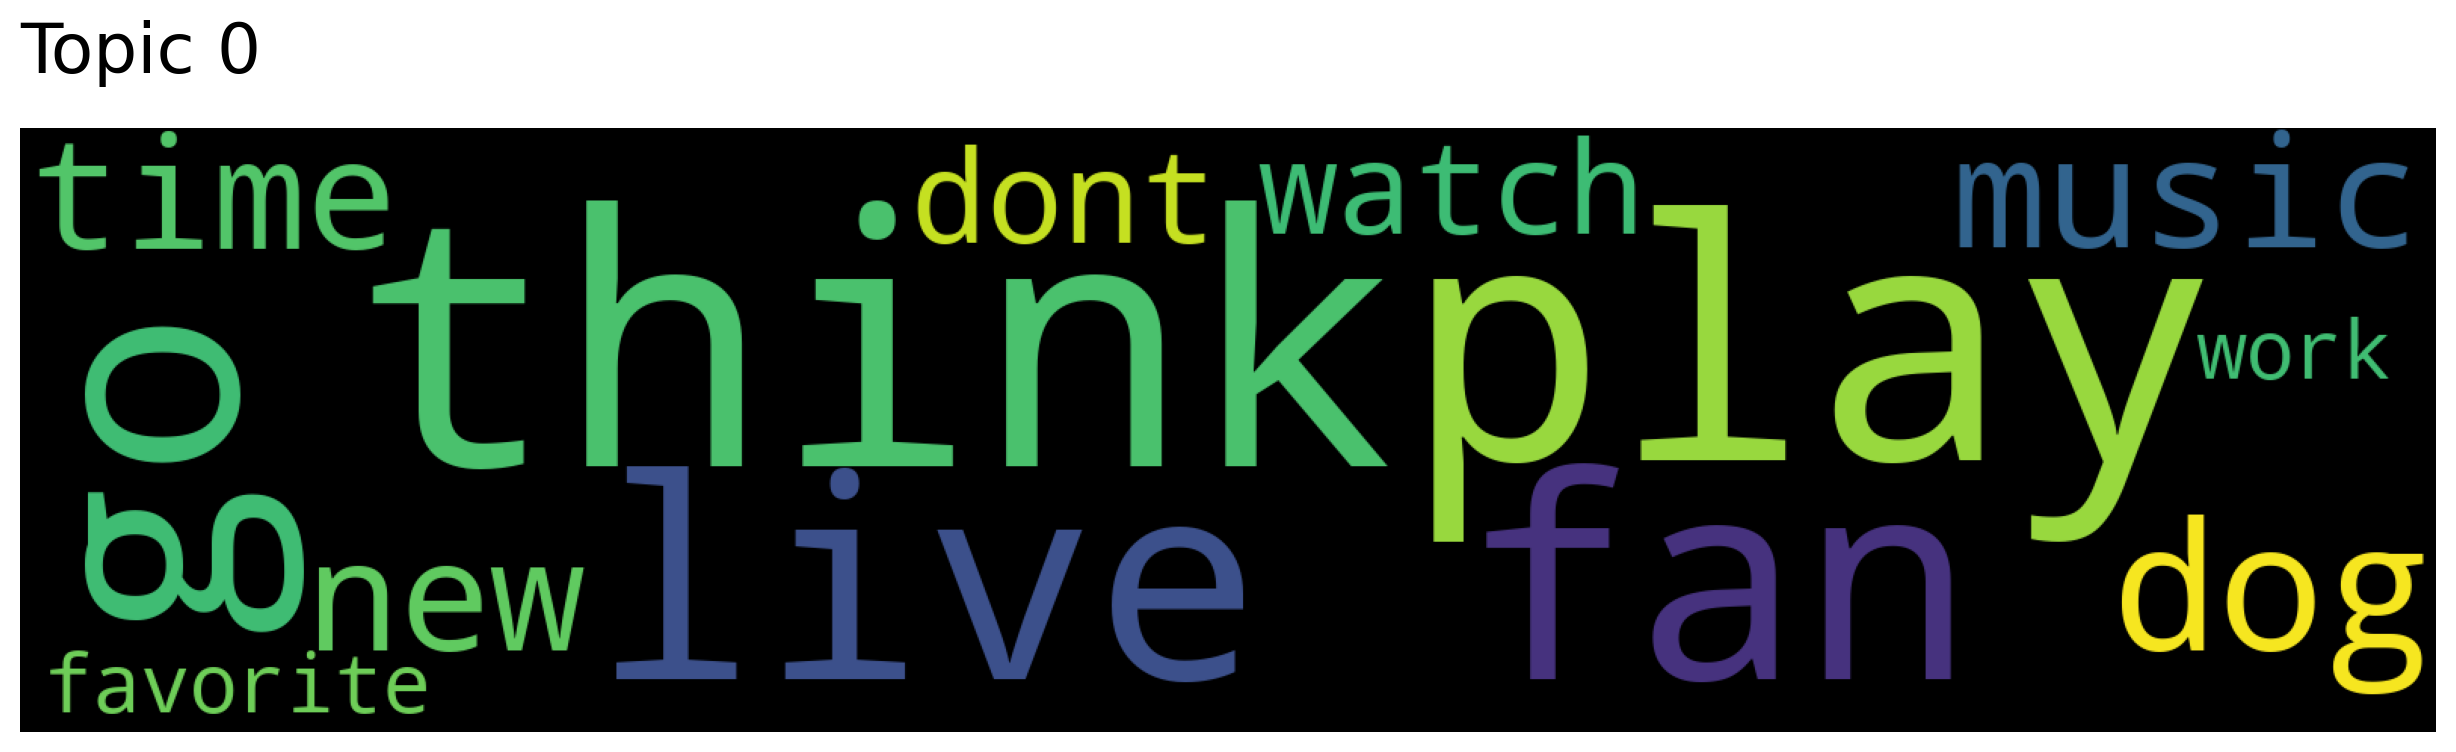

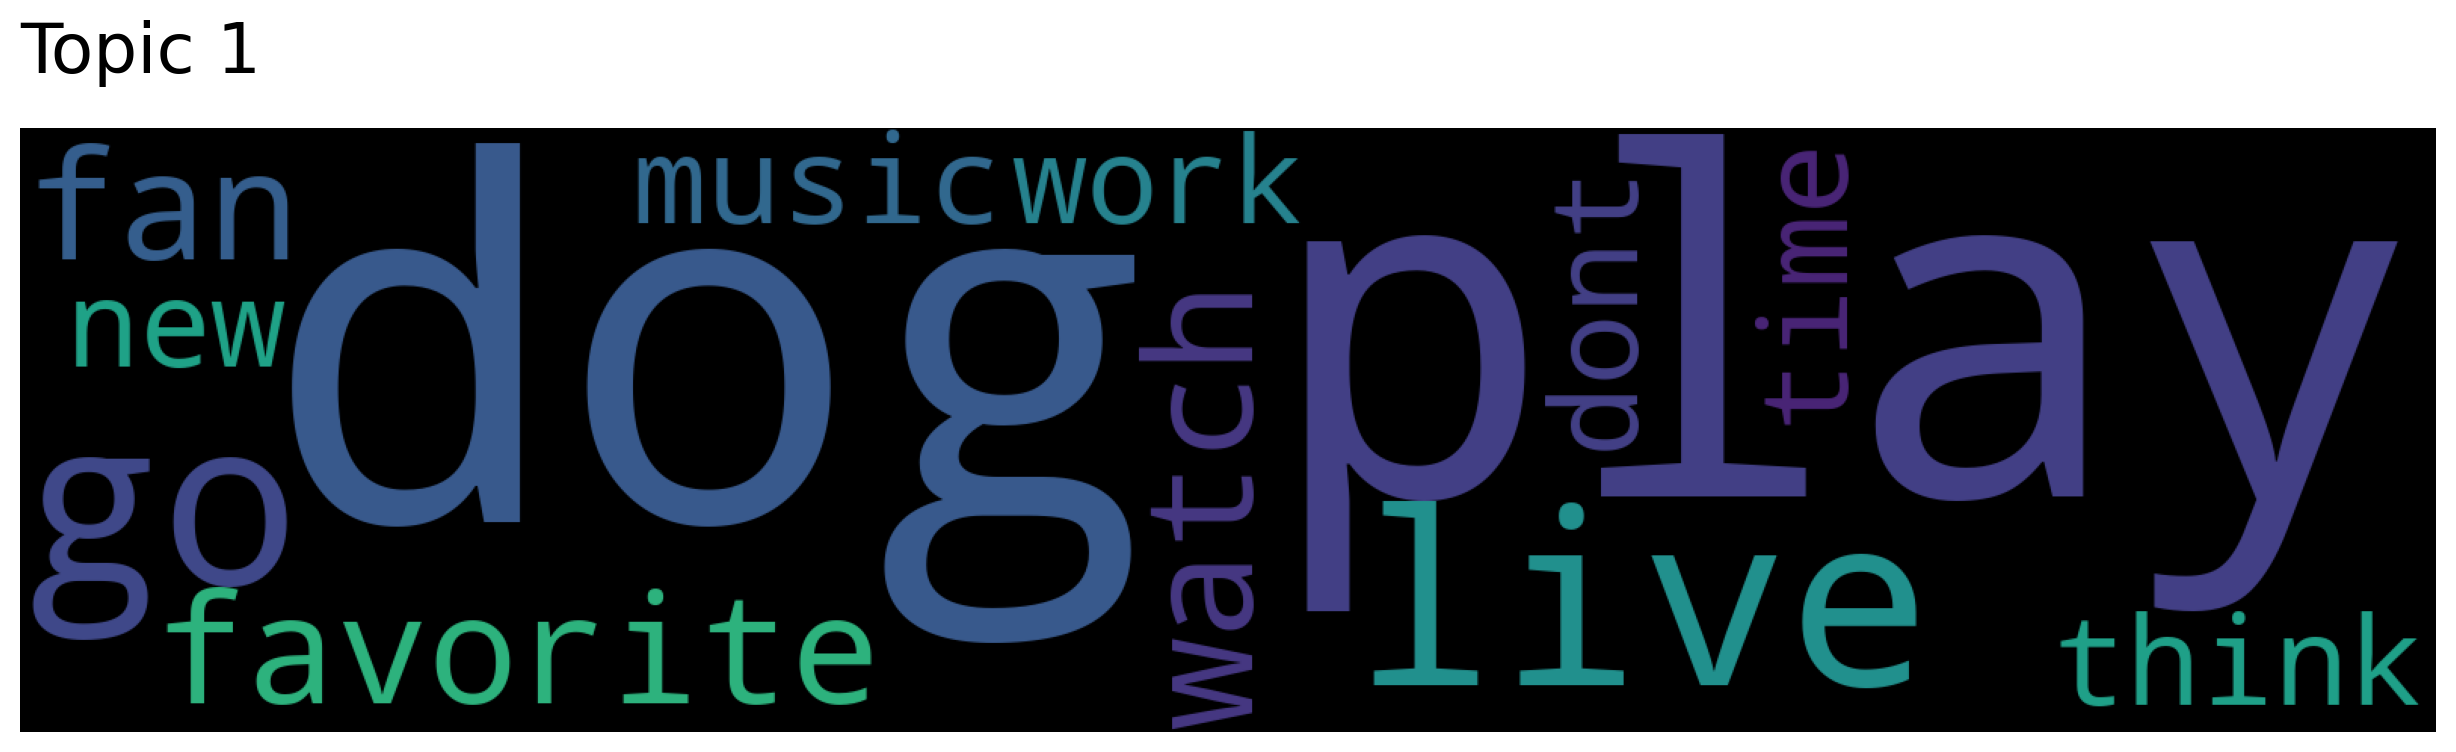

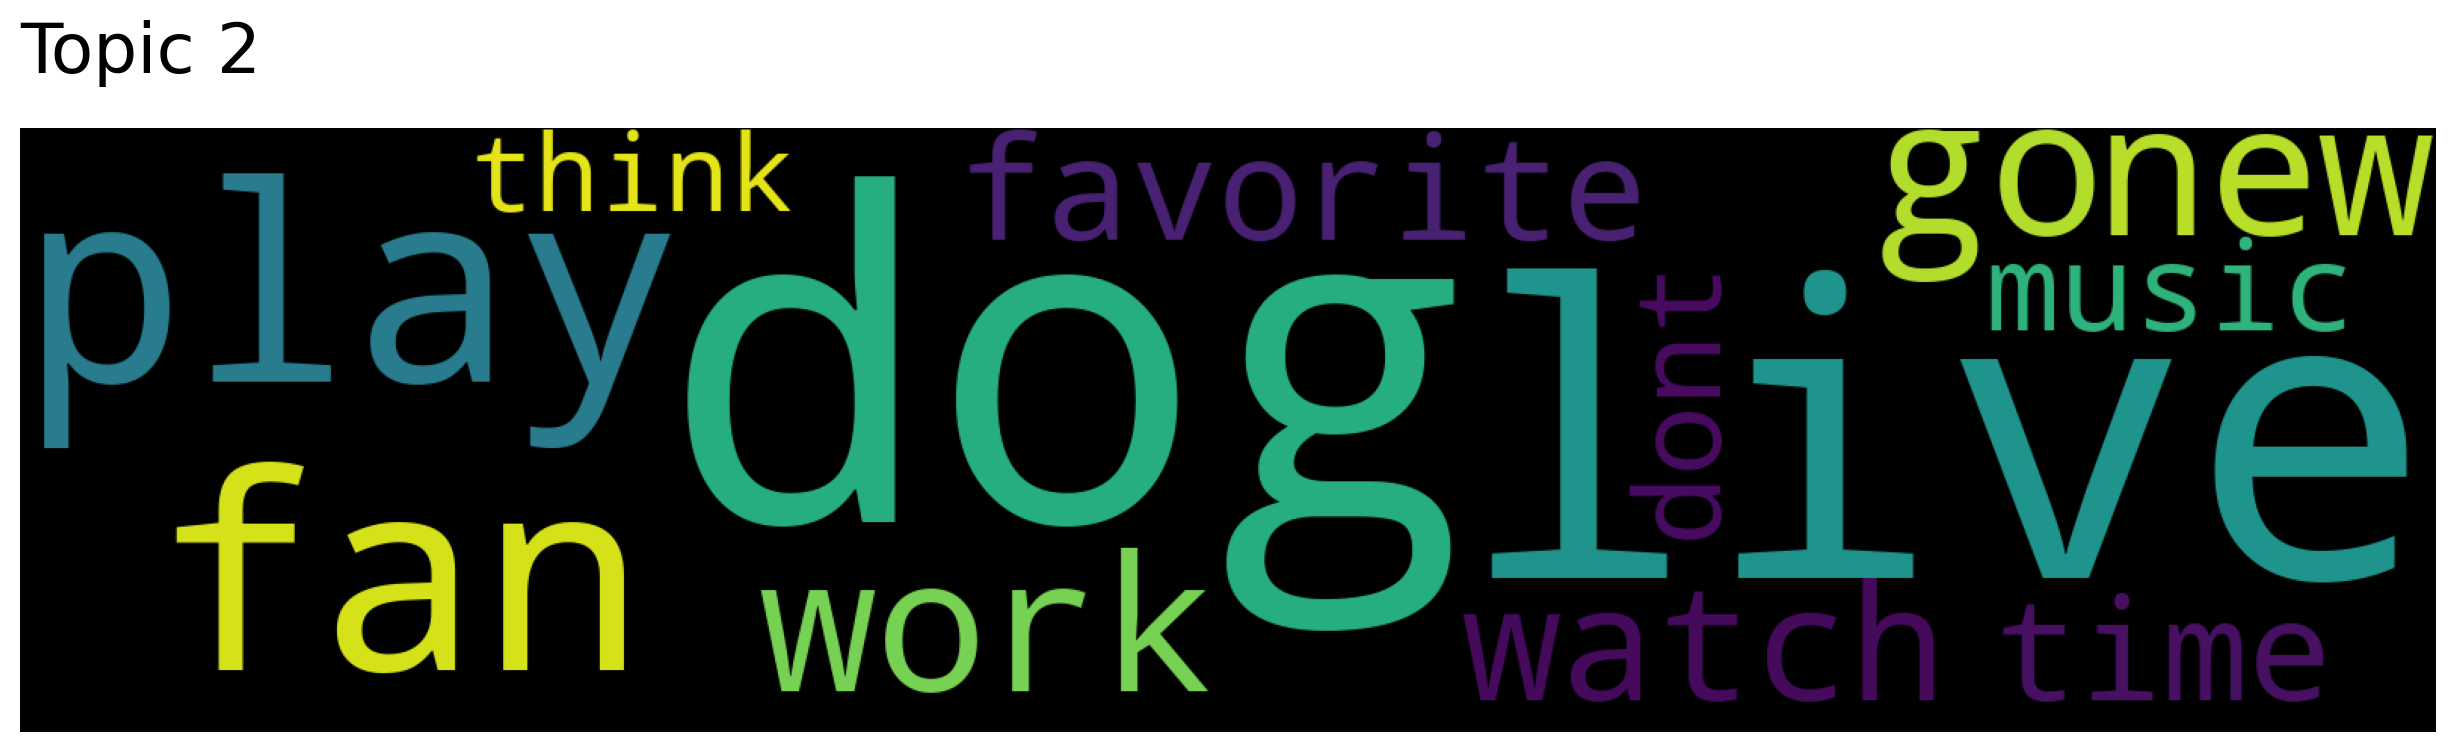

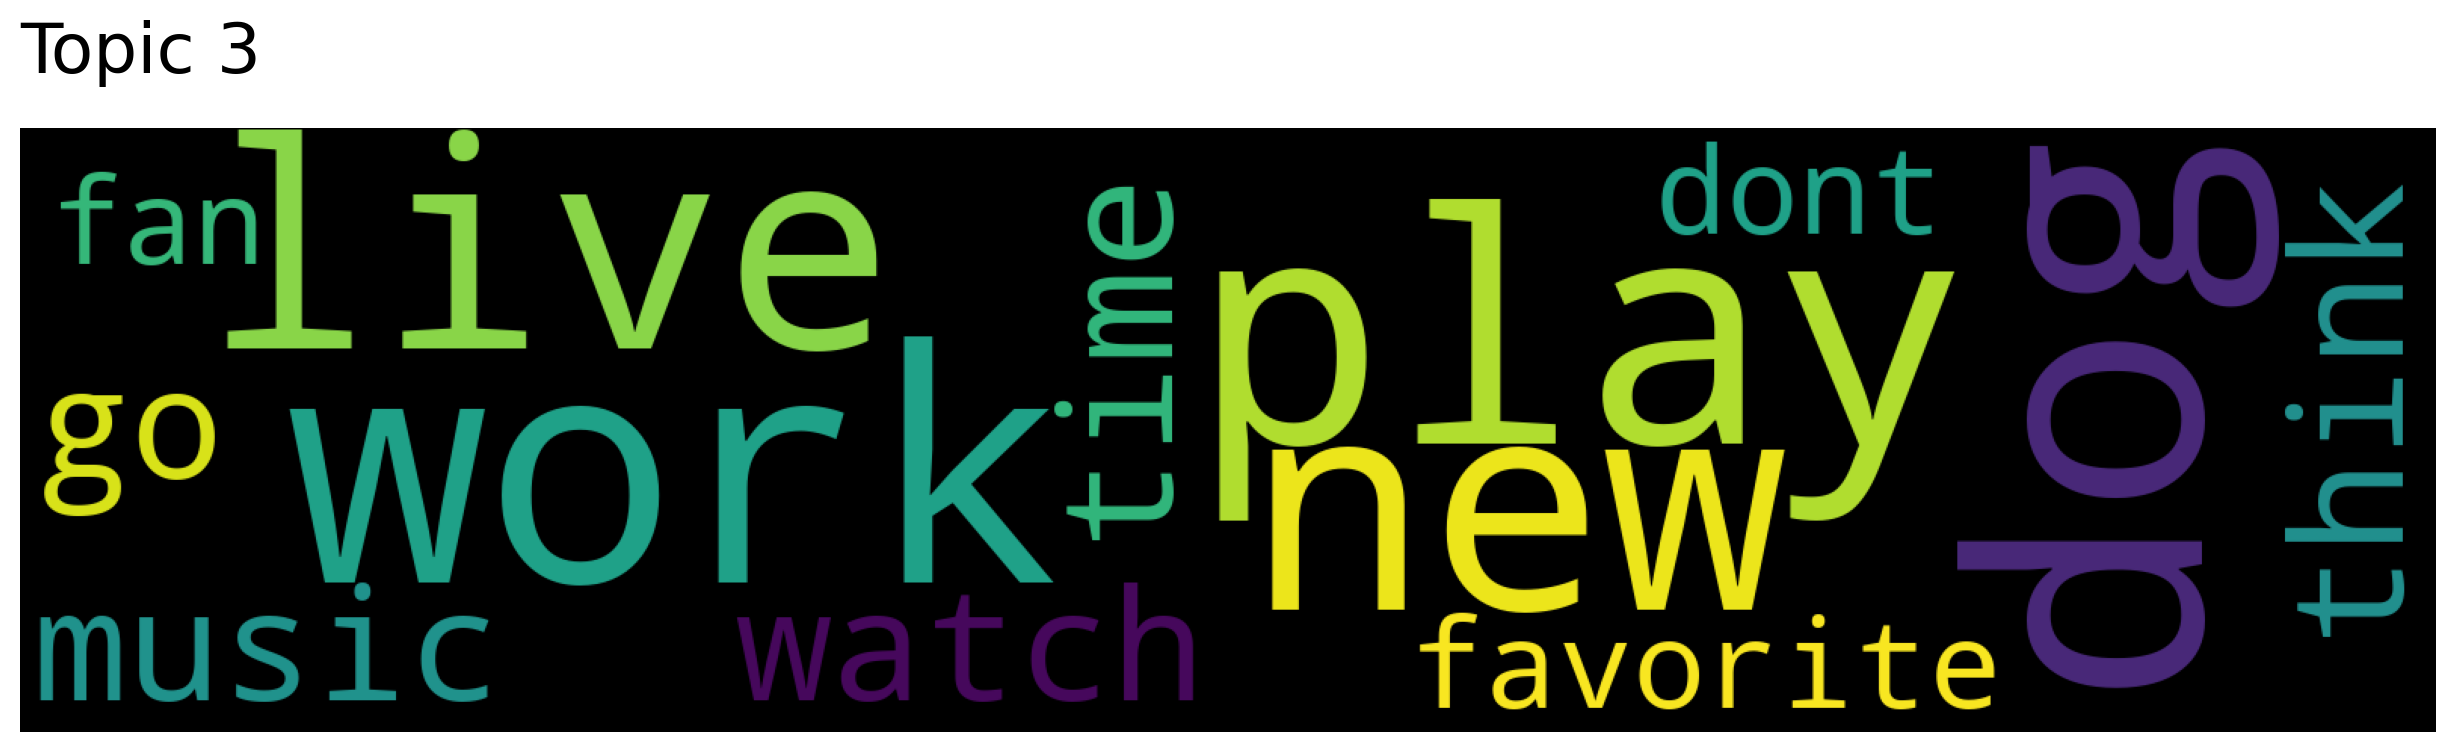

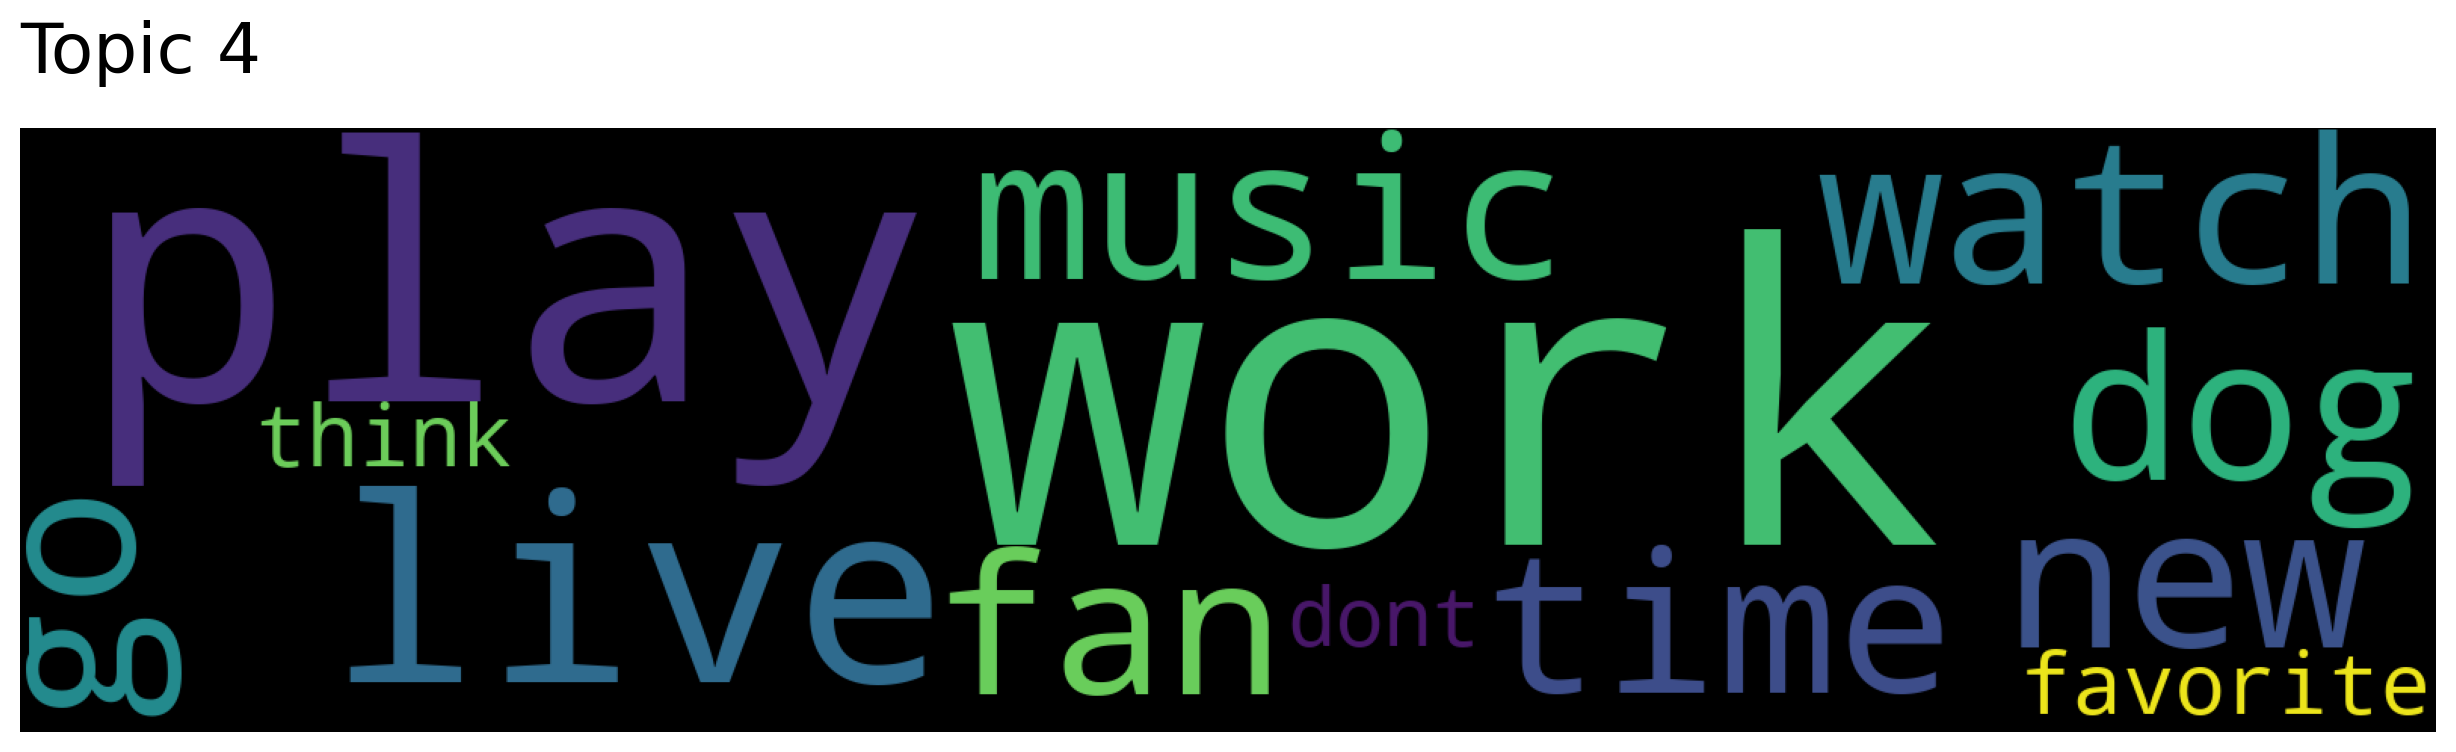

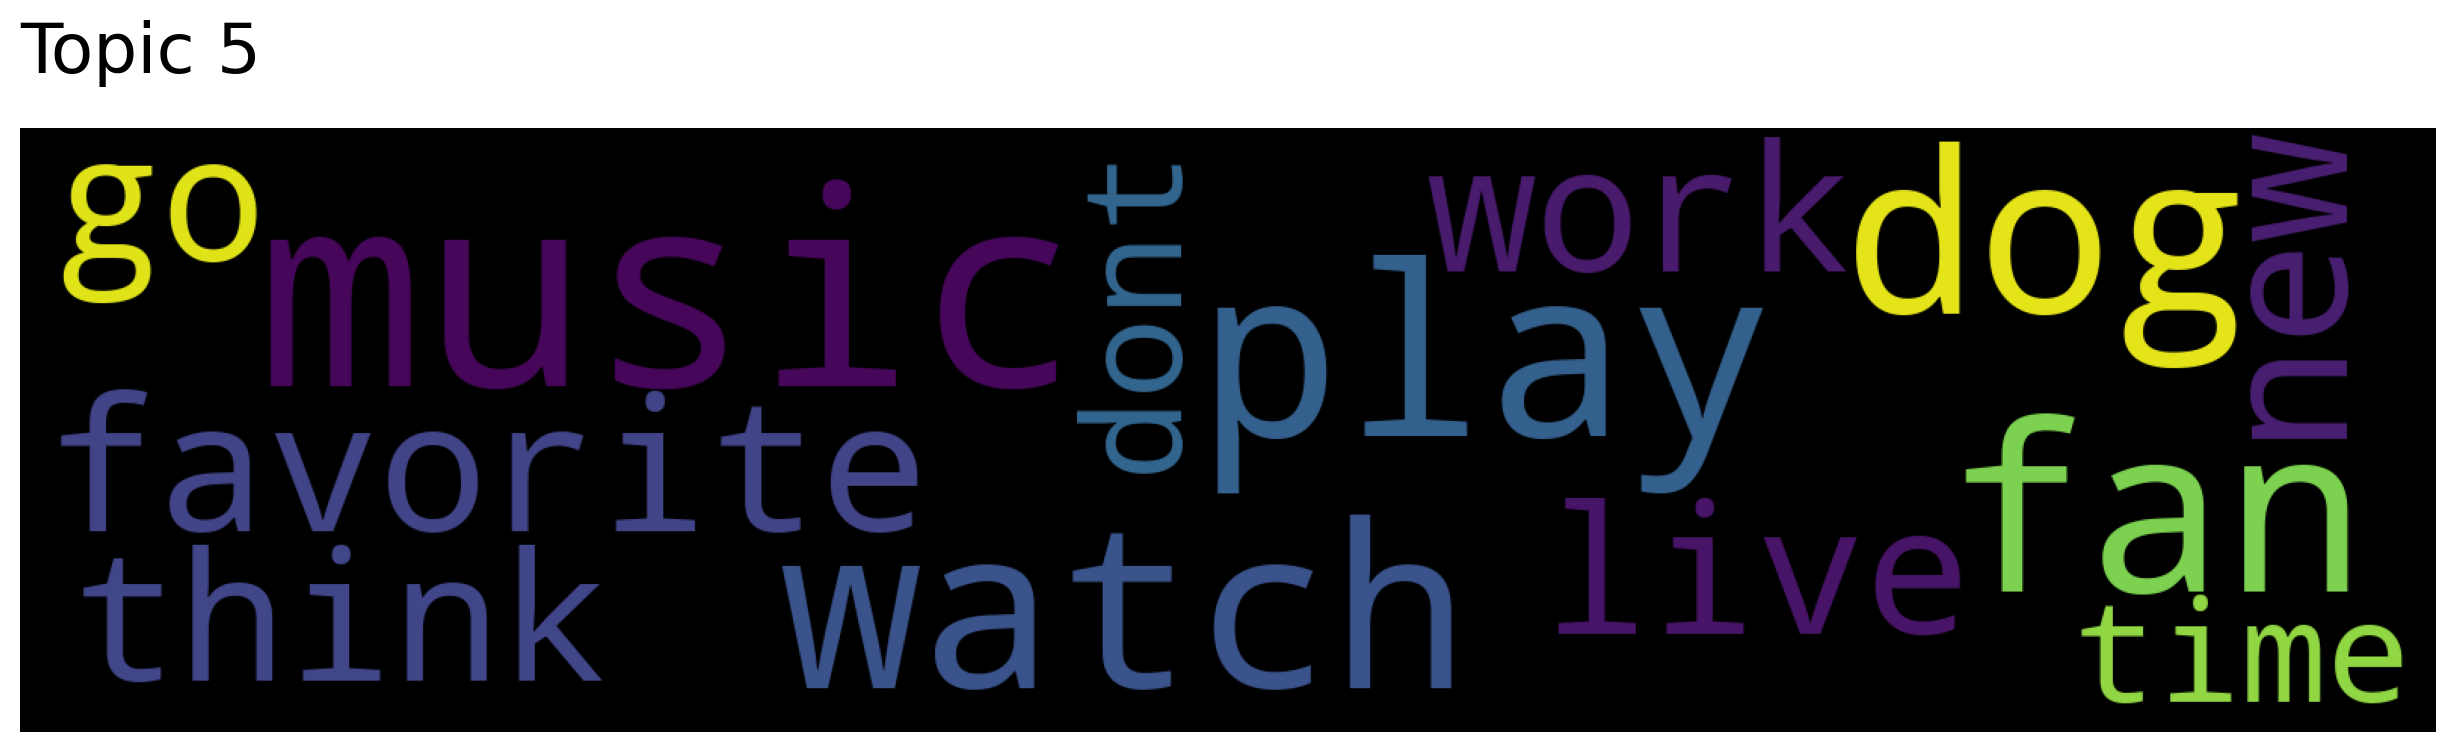

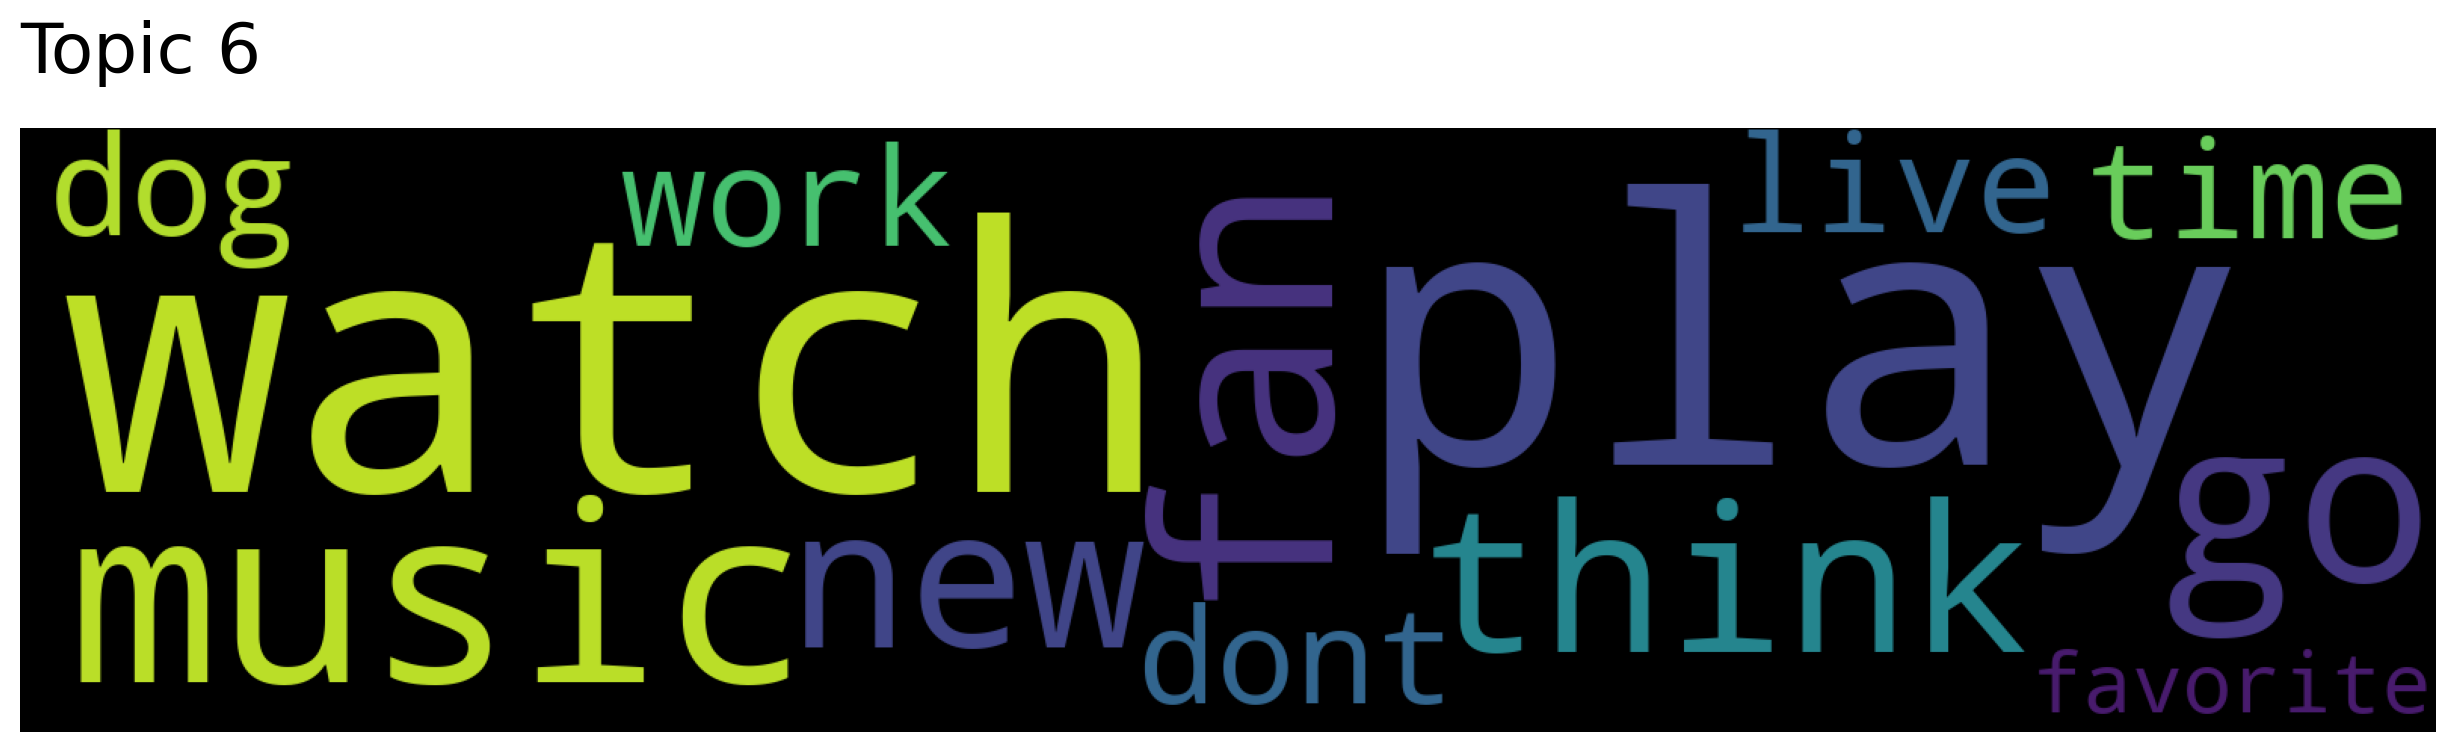

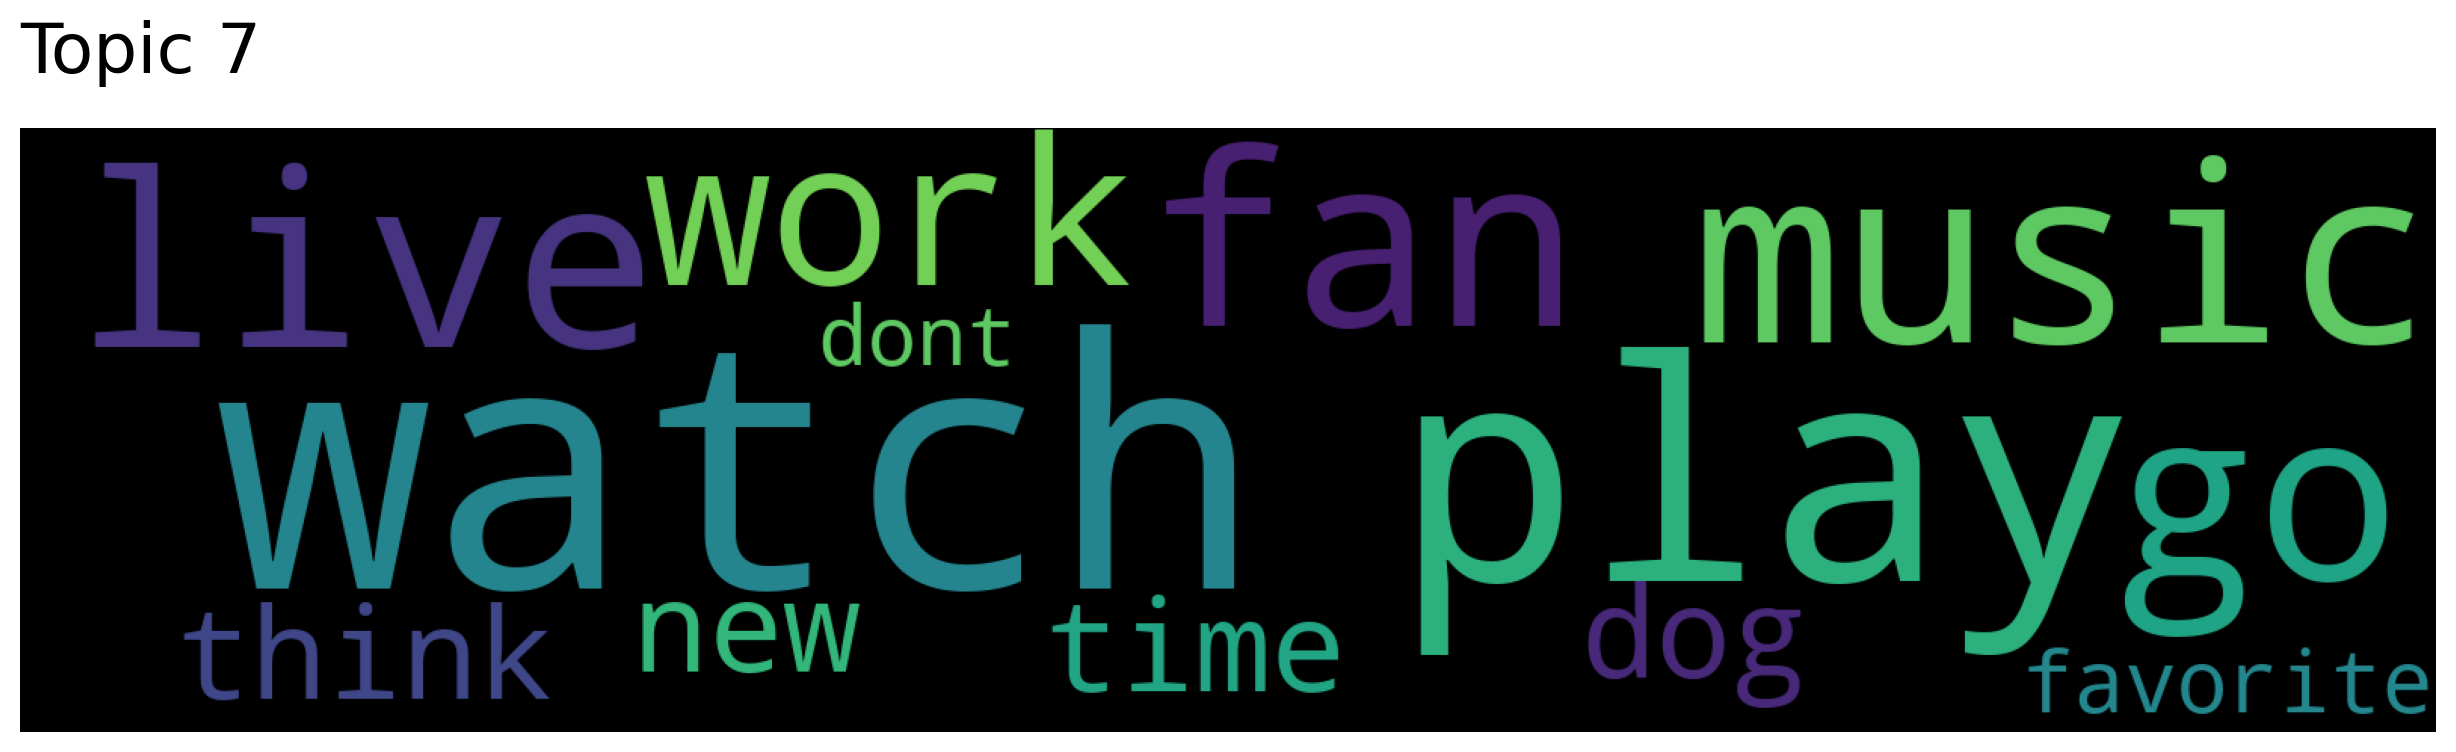

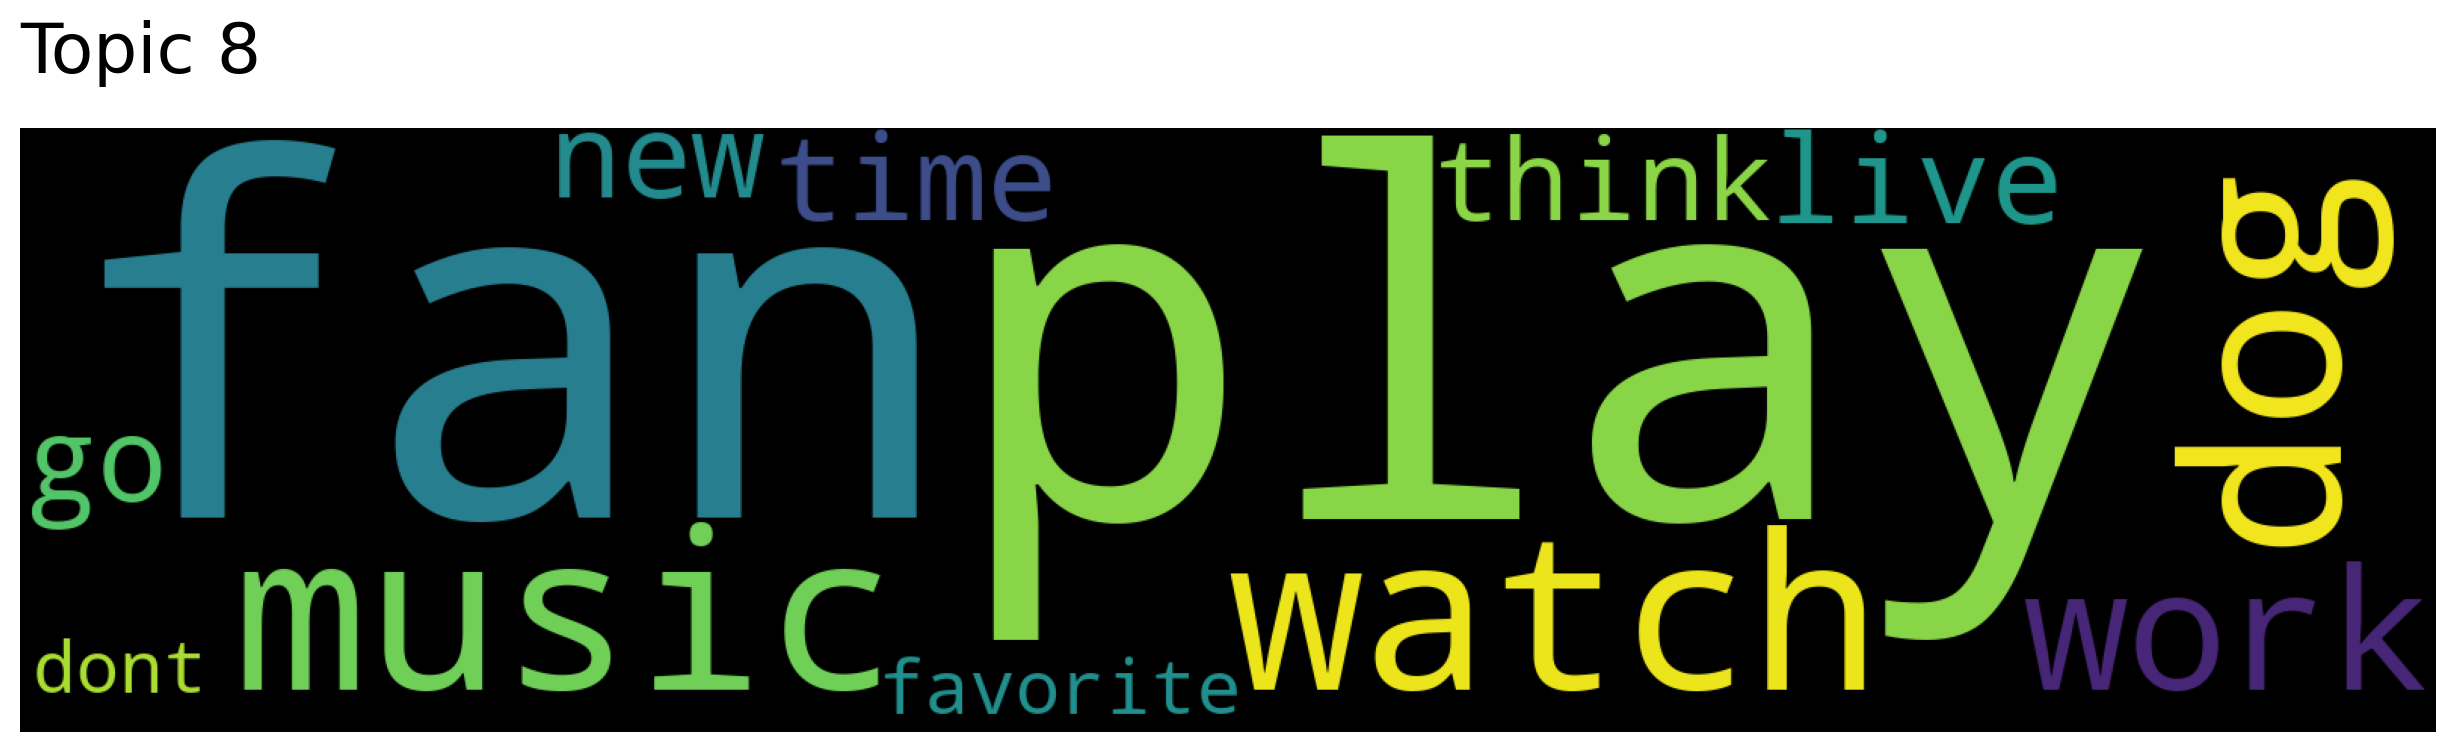

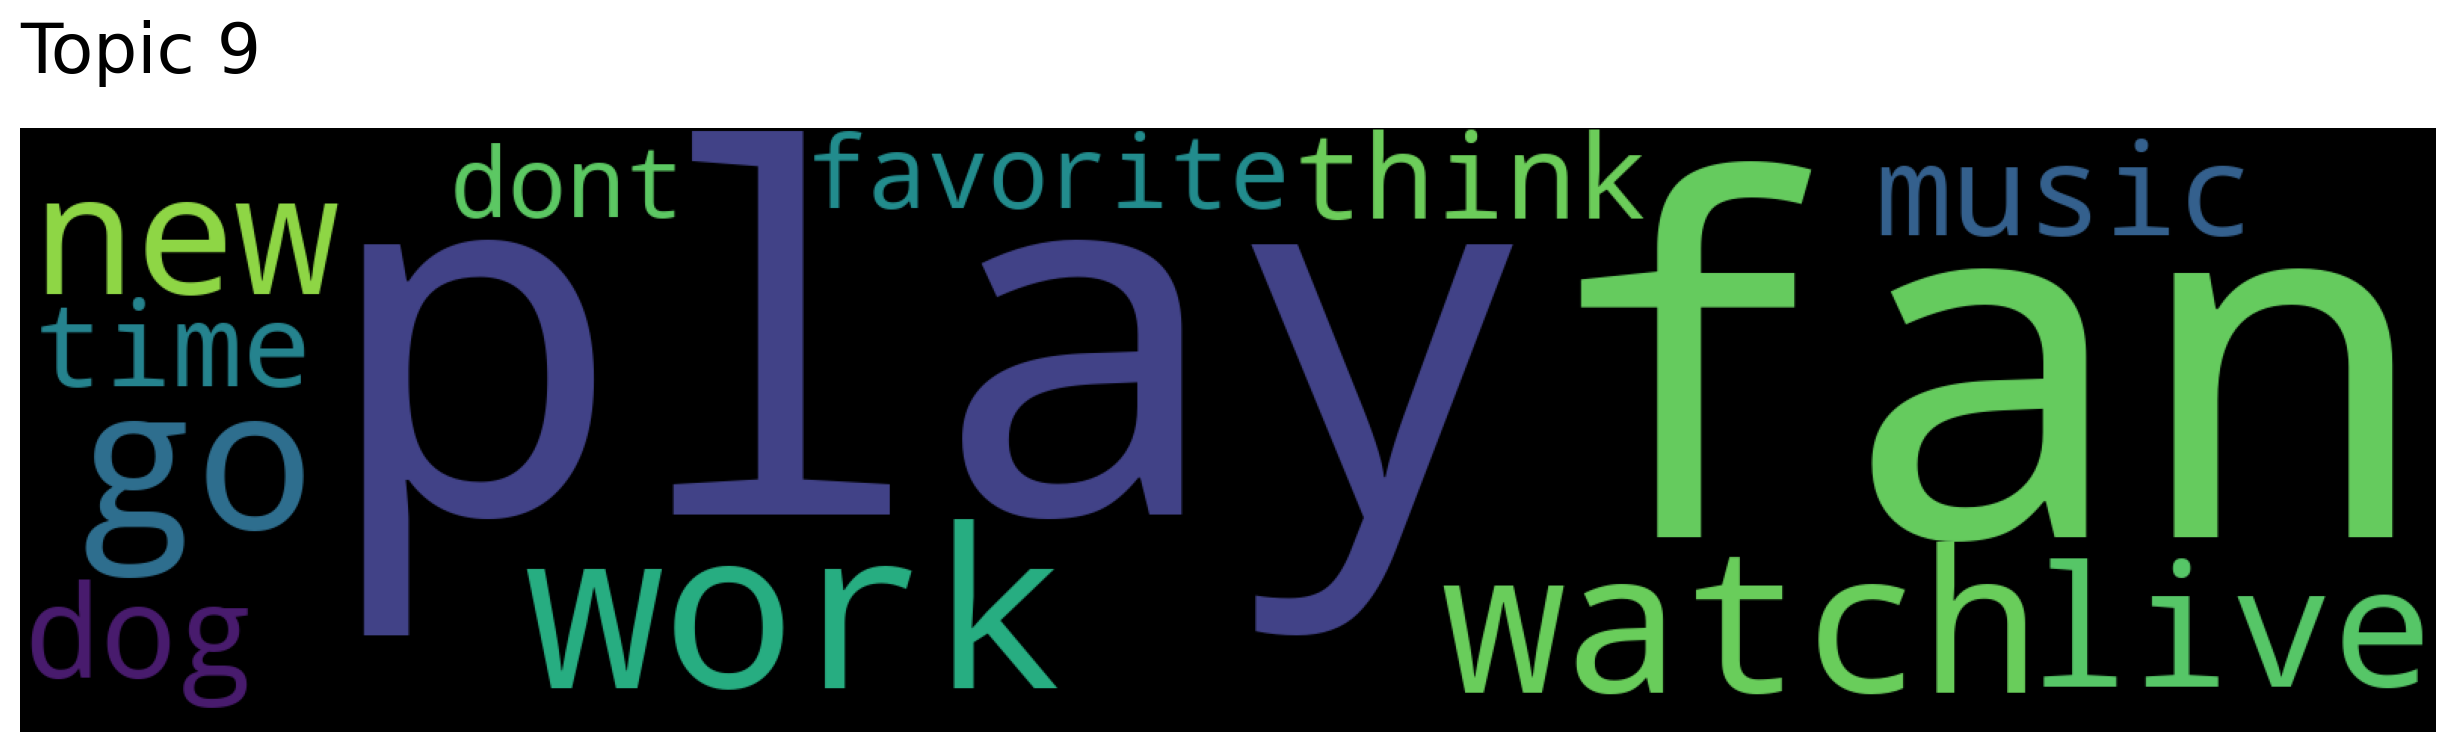

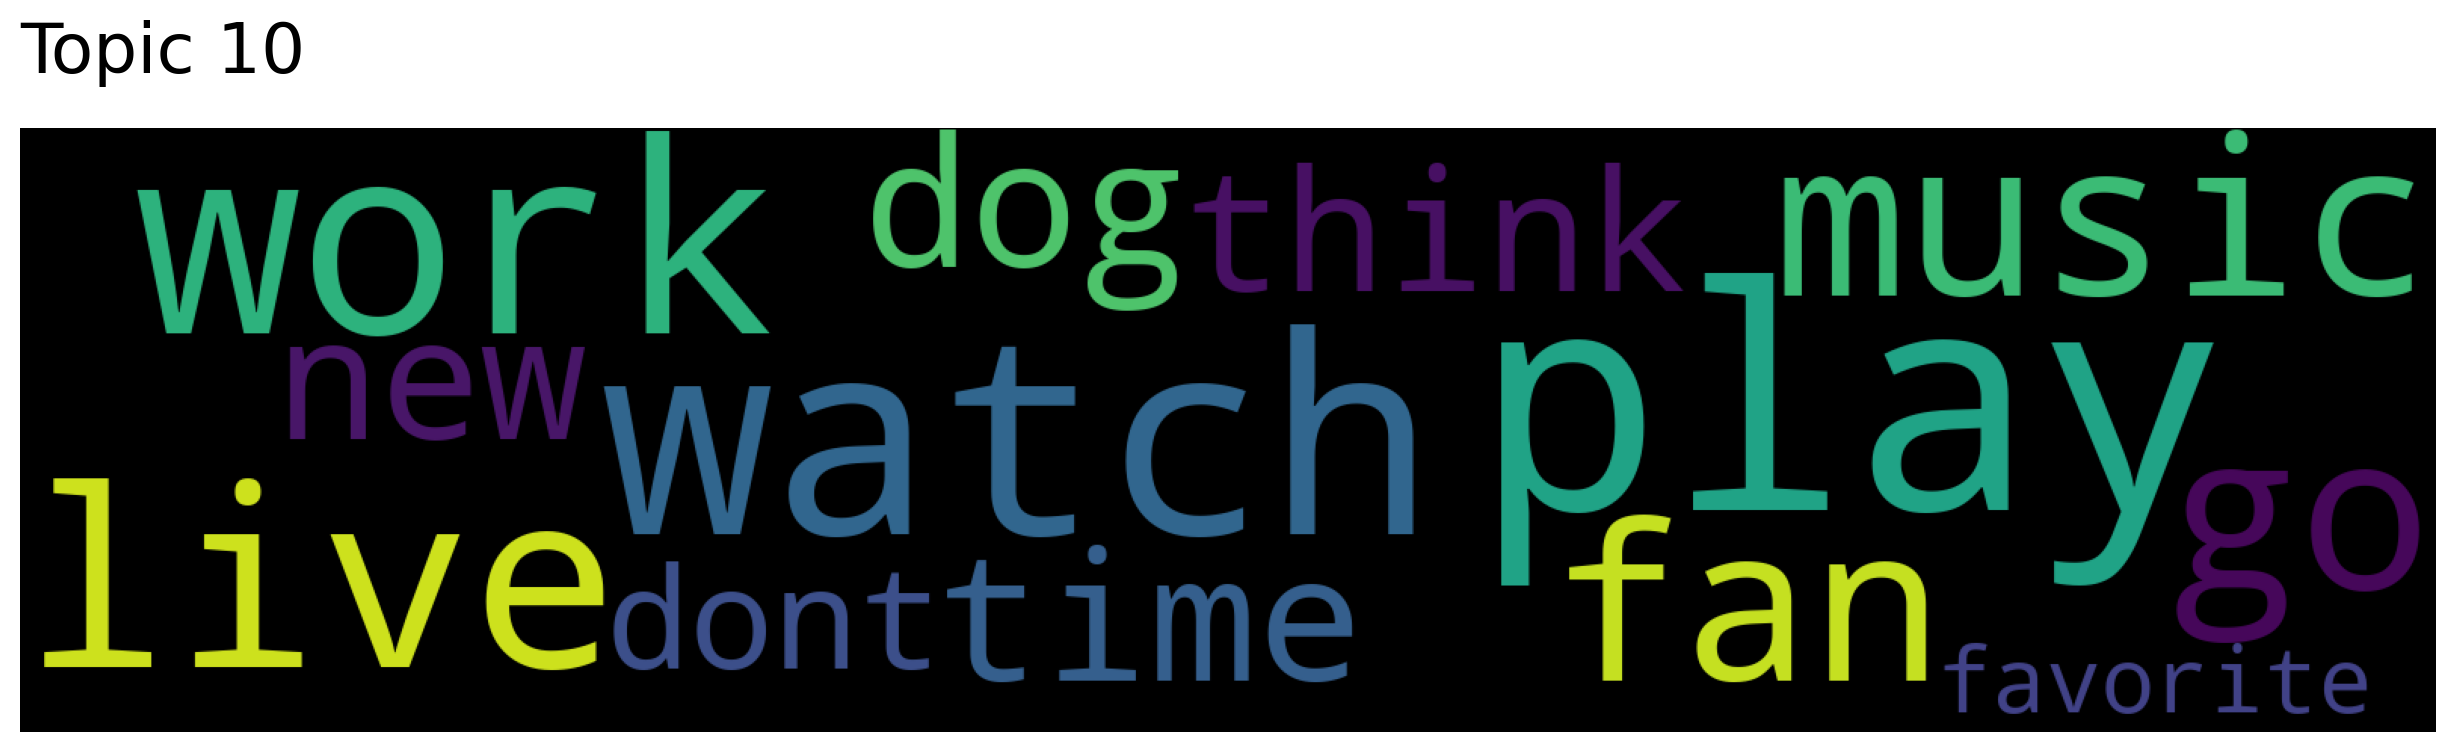

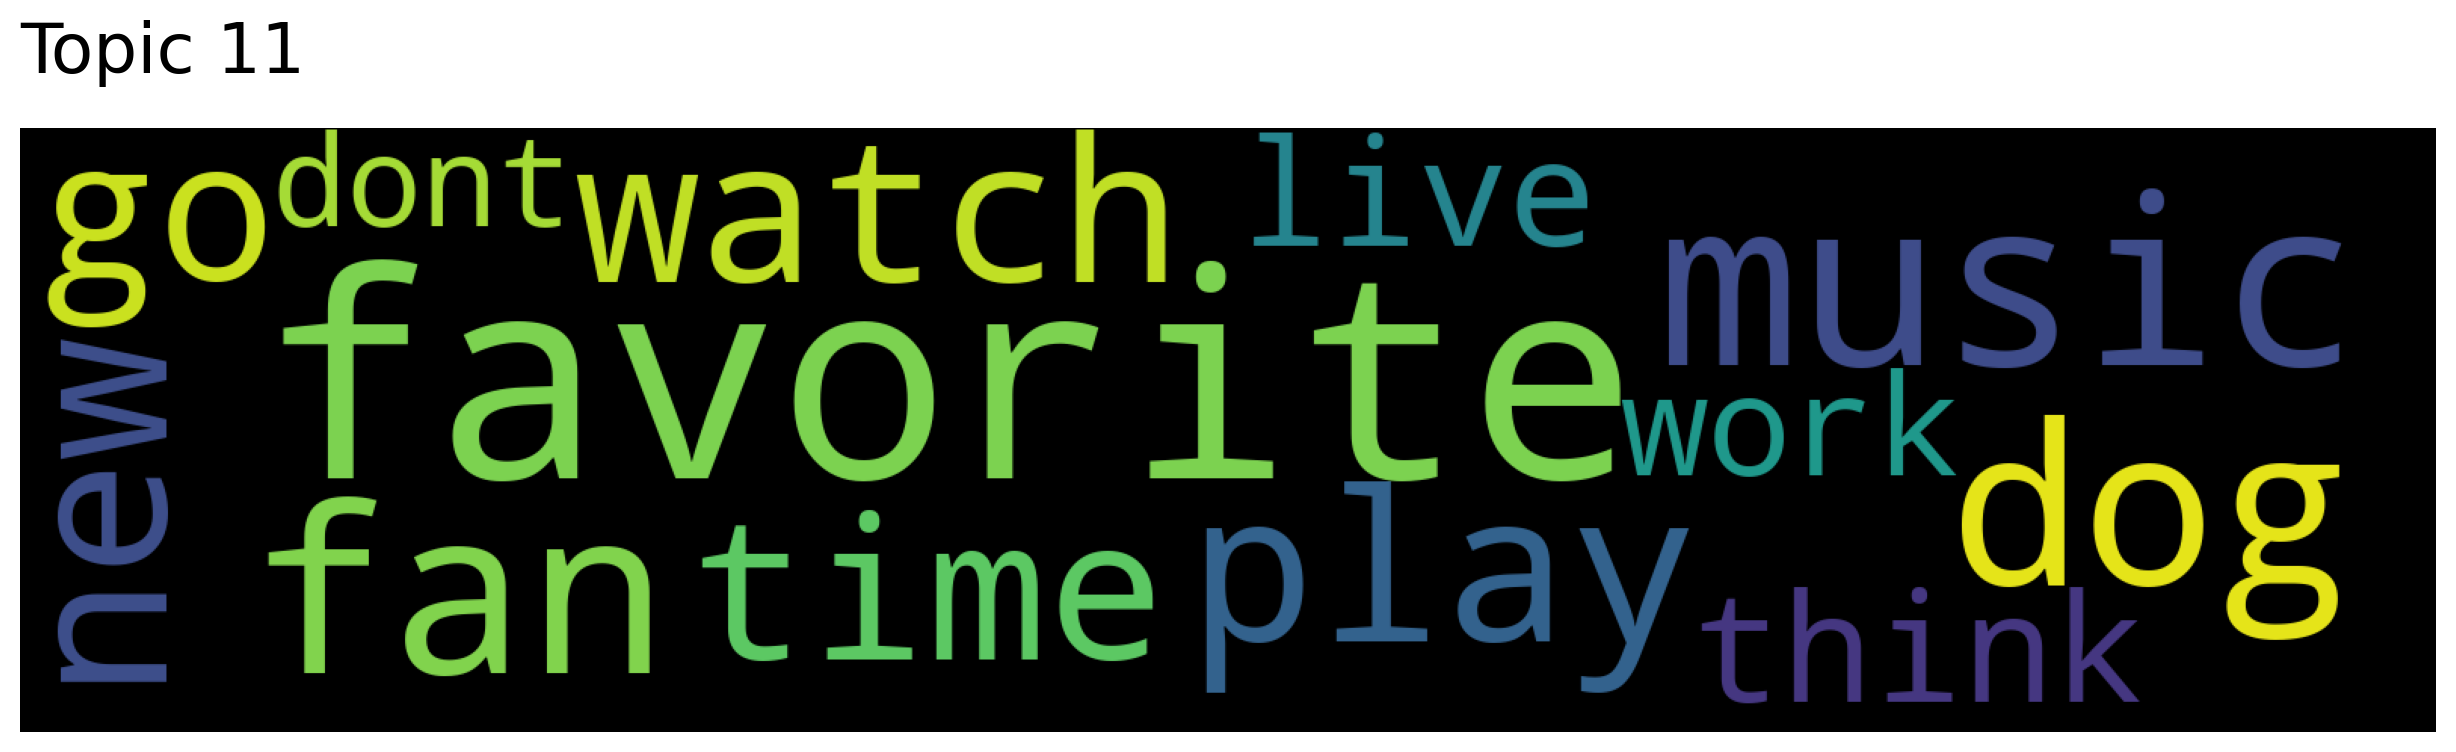

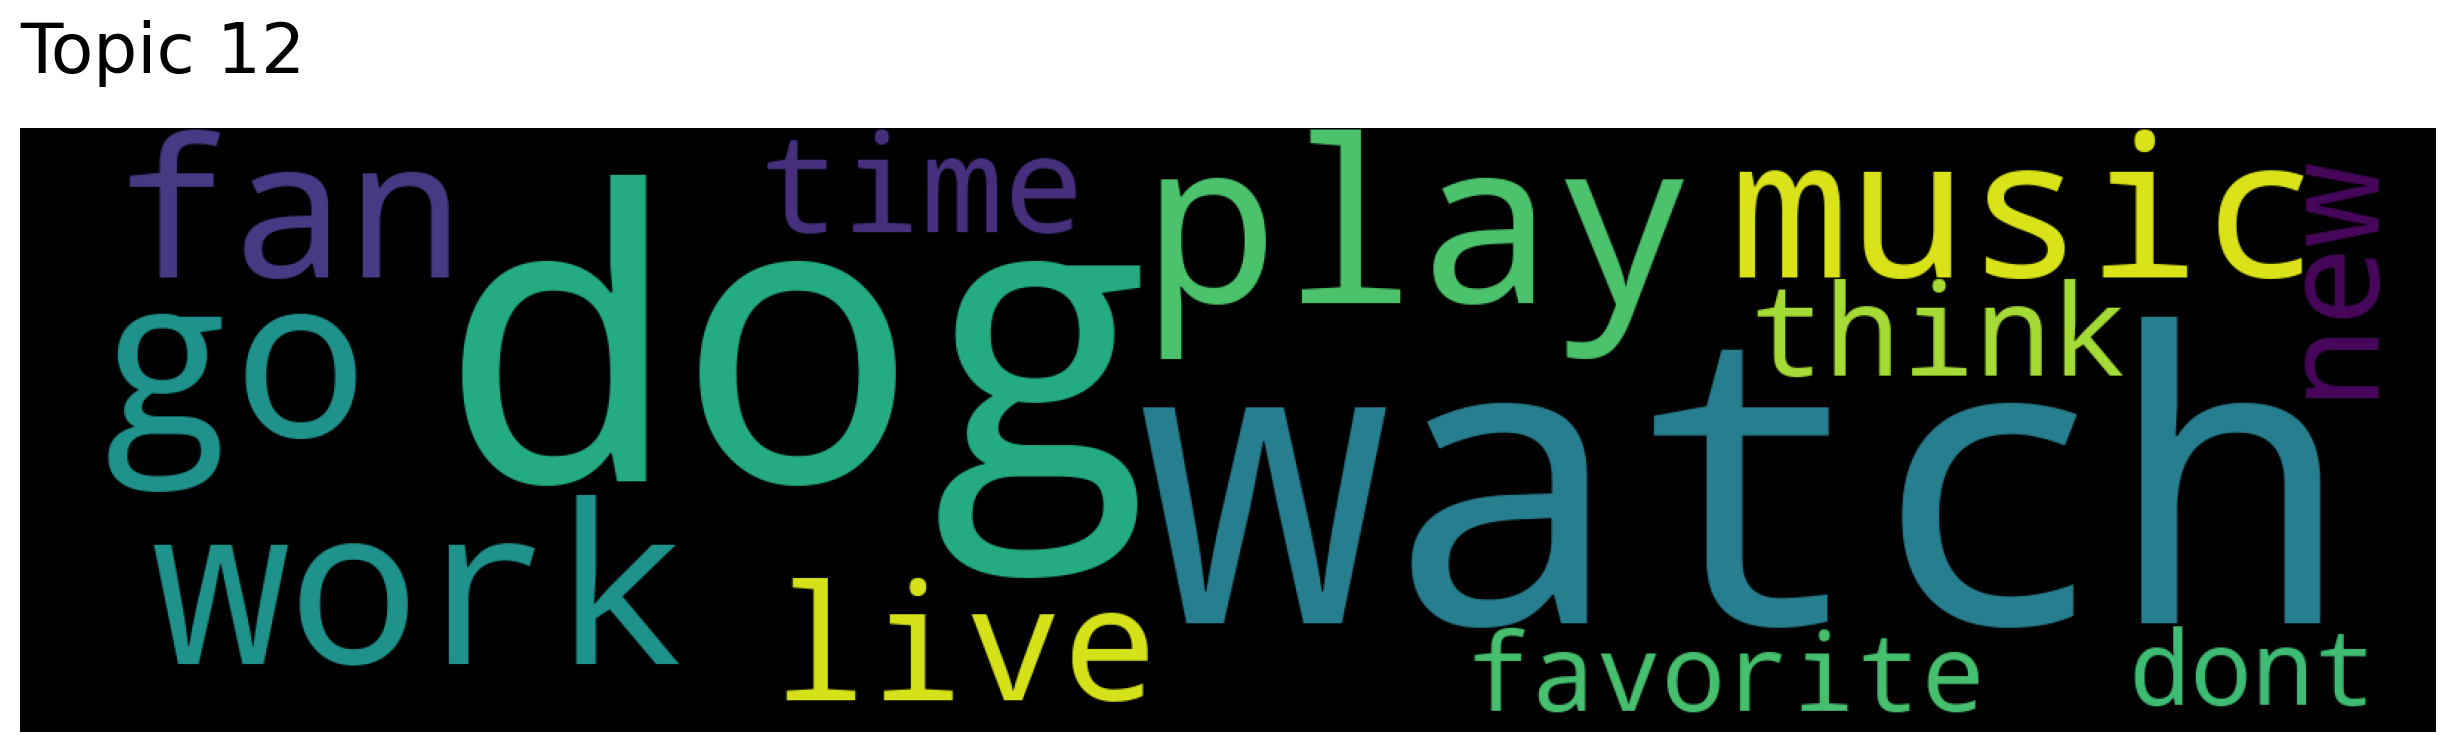

In [24]:
for topic in topic_nums[:17]:
    model.generate_topic_wordcloud(topic, background_color="black")

## Search Document by topic

In [25]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=4, num_docs=2)

In [26]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=4, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 340, Score: 0.7010360956192017
-----------
get work gas station job
-----------

Document: 241, Score: 0.6816328763961792
-----------
work cleaner school
-----------



In [27]:
words, word_scores = model.similar_words(keywords=["music"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

watch 0.4169783155556716
play 0.41390777188340433
dog 0.36706738211891465
fan 0.36467851438891585
time 0.35000875896999706
live 0.34258185421204773
work 0.3377467553558864
new 0.30905484253143245
think 0.25742399498251617
go 0.23353490541375077


In [28]:
documents, document_scores, document_nums = model.search_documents_by_topic(topic_num=12, num_docs=4)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 340, Score: 0.7202203273773193
-----------
shop shoe watch
-----------

Document: 241, Score: 0.6779953241348267
-----------
shop shoe watch inpopular thing mar
-----------



## Get Documents Topics

In [29]:
doc_topics = model.get_documents_topics([400]) 

## Visualizing the topics

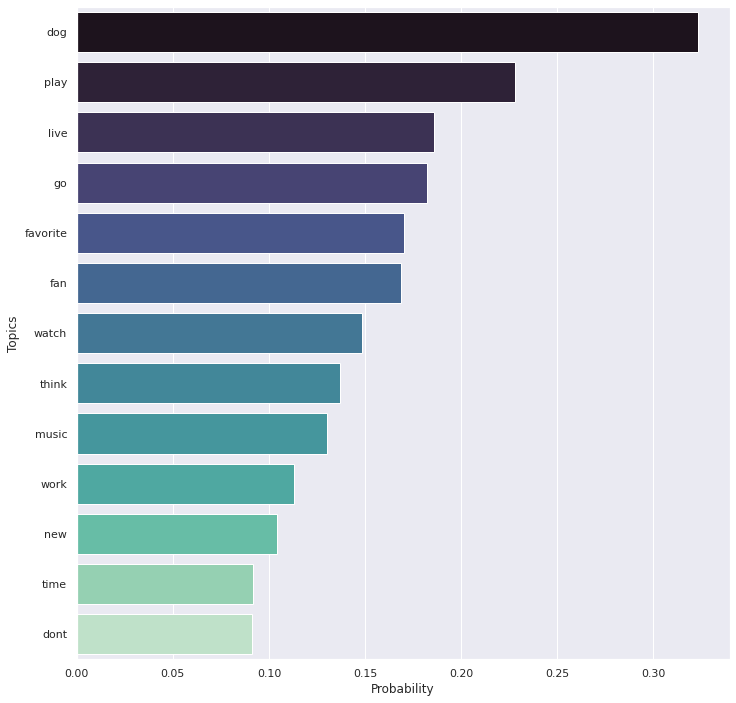

In [30]:
import seaborn as sns
   
topic_names = doc_topics[2]
topic_probs = doc_topics[3]
df_topics = pd.DataFrame(topic_names).transpose().rename(columns={0 : "Topics"})
df_probs = pd.DataFrame(topic_probs).transpose().rename(columns={0 : "Probability"})
df = pd.concat([df_topics, df_probs], axis=1)
   
sns.set(rc={'figure.figsize':(11.7,12)})
   
ax = sns.barplot(x="Probability", y="Topics", data=df, palette="mako")

In [31]:
words, word_scores = model.similar_words(keywords=["work"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

play 0.4990355739319299
live 0.48329145044683575
go 0.4379022552623011
watch 0.4277716390161894
time 0.41614916688962955
dont 0.38243503171892945
dog 0.3590079399973135
new 0.3512399017205126
music 0.33774676966948736
think 0.2672820776186409
fan 0.24768185835567944
favorite -0.02472362708532904
